In [1]:
import acimops # " 's Cython Image Ops"
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PIM

def loadPixels(path):
    pim = PIM.open(fp=path);
    return np.array(pim)/255.0;

def saveImage(pixels, output_path):
    if(pixels.dtype.kind in 'f'):
        px = (pixels * 255).astype(np.uint8);
    else:
        px=pixels;  
    PIM.fromarray(px).save(output_path);
    
def showMask(p):
    fig = plt.imshow(p);
    fig.set_cmap('gray')
    plt.axis('off');
    
    
def showImage(pixels, title=None):
    plt.imshow(pixels)
    if(title is not None):
        plt.title(title)
    plt.axis('off');
    plt.show()
    
def getIntVersion(pixels):
    if (pixels.dtype.kind in 'iu'):
        return pixels.copy();
    else:
        return (pixels.copy()*255).astype(np.uint8);
    
    
def GetScaled(pixels, shape=None, shape_xy=None):
    shapeis = (shape is not None);
    shapexyis = (shape_xy is not None);
    assert(shapeis != shapexyis), "Must provide only one of shape or shape_xy for Image.GetScaled"
    if(shapeis):
        sz=[shape[0], shape[1]];
    else:
        sz=[shape_xy[1],shape_xy[0]];
    
    pix = getIntVersion(pixels);
    imK = np.array(PIM.fromarray(pix).resize((int(sz[1]),int(sz[0]))));
    return imK/255.0;


def GetScaledByFactor(pixels, factor=1.0):
    return GetScaled(pixels, [int(pixels.shape[0] * factor), int(pixels.shape[1] * factor)]);
    

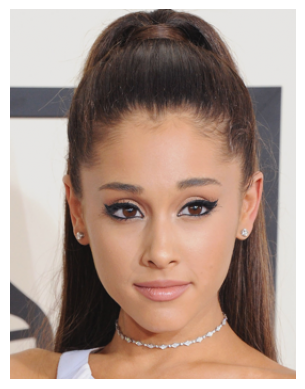

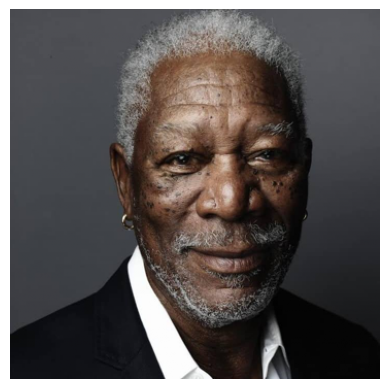

In [2]:
ariana = loadPixels("./inputs/arianagrande.png");
ariana = GetScaledByFactor(ariana, 0.5);
showImage(ariana)


morgan = loadPixels("./inputs/morganfreeman.jpeg");
morgan = GetScaledByFactor(morgan, 0.5);
showImage(morgan)

In [10]:
ariana_sigmas = [5,5,0.05];
morgan_sigmas = [11,11,0.09];

In [4]:
def GetBilateralFiltered(pixels, sigmas):
    return acimops.bilateral.getBilateralFiltered(pixels, sigmas);

def GetCrossBilateralFiltered(image, guide, sigmas):
    return acimops.bilateral.getCrossBilateralFiltered(image, guide, sigmas);




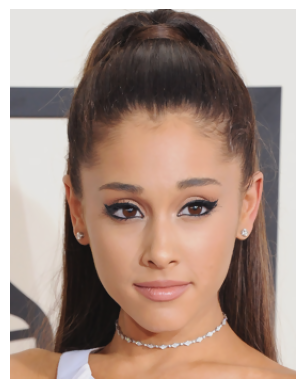

In [5]:
ariana_filtered = GetBilateralFiltered(ariana, ariana_sigmas);
showImage(ariana_filtered)

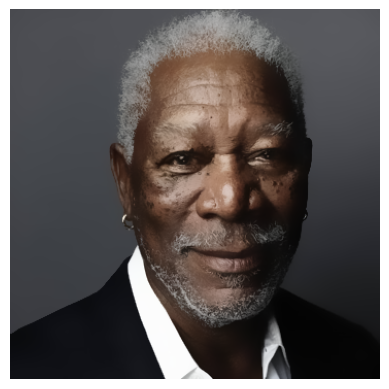

In [6]:
morgan_filtered = GetBilateralFiltered(morgan, morgan_sigmas);
showImage(morgan_filtered)

In [25]:
class TestCase:
    def __init__(self, image, image_scale=1, noise_stats=[0.5,0.2]):
        self.image = image
        self._sigmas = [];
        self.noise = np.random.normal(noise_stats[0], noise_stats[1], size=(self.image.shape[0], self.image.shape[1], 3))
        self.filteredValues = [];
        self.calculateFiltered([1,1,0.1]);
        
    def calculateFiltered(self, sigmas):
        self.filteredValues.append(GetCrossBilateralFiltered(image=self.noise, guide=self.image, sigmas=sigmas));
        self._sigmas.append(sigmas);
        
    def showNoiseResult(self, index=None, enhance=5):
        if(index is None):
            index = len(self._sigmas)-1;
        if(index>=0):
            im = self.noise;
            filtered = self.filteredValues[index];
            detail = (im-filtered);
            showImage(self.noise, "Original Noise")
            showImage(filtered, "Filtered Noise")
            showImage(detail, "Detail")
            detail_abs = np.abs(detail);
            showImage(detail_abs, "abs(Detail)")
            moreDetail = enhance*detail;
            showImage(moreDetail, "Detail*{}".format(enhance))
            showImage(((filtered-0.5)*enhance)+0.5, "((filtered-0.5)*{})+0.5".format(enhance))

            
    def showDetailResult(self, sigmas=[5,5,0.05], enhance=3):
        im = self.image;
        filtered = GetBilateralFiltered(self.image, sigmas);
        detail = im-filtered;
        showImage(self.image, "Original")
        showImage(filtered, "Filtered")
        showImage(detail+0.5, "Detail")
        moreDetail = im+enhance*detail;
        showImage(moreDetail, "Detail*{}".format(enhance))

    @property
    def lastSigmas(self):
        return self._sigmas[-1];
        
        

In [26]:
arianaTC = TestCase(ariana)

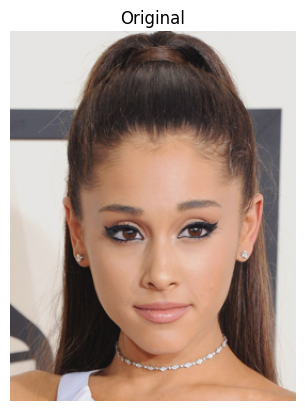

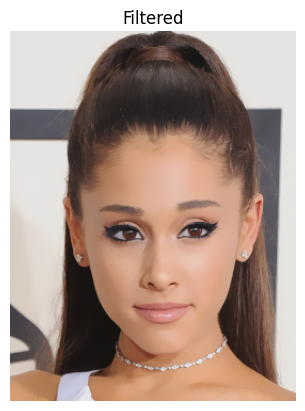

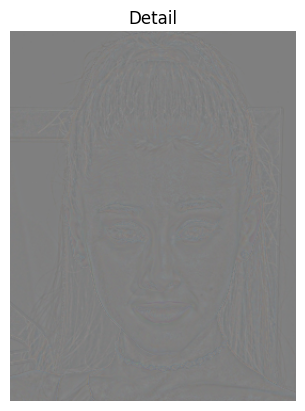

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


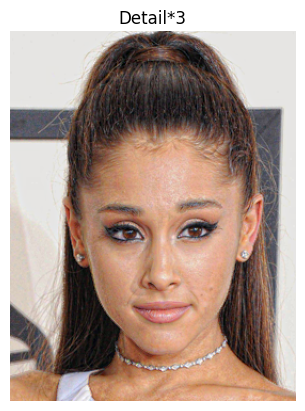

In [27]:
arianaTC.showDetailResult()

In [ ]:
arianaTC.showNoiseResult()

In [28]:
morganTC = TestCase(morgan)

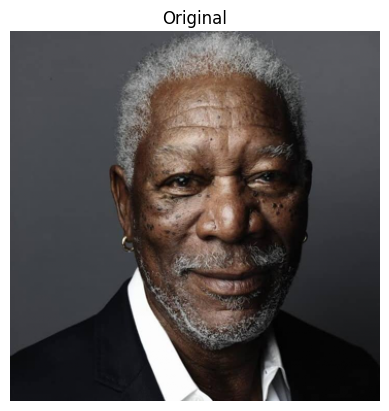

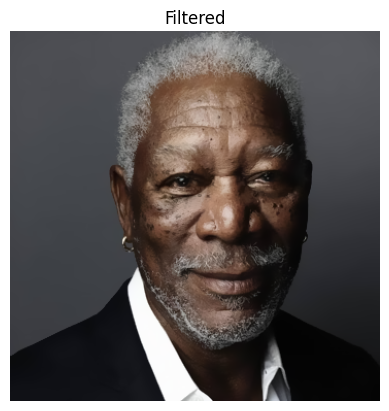

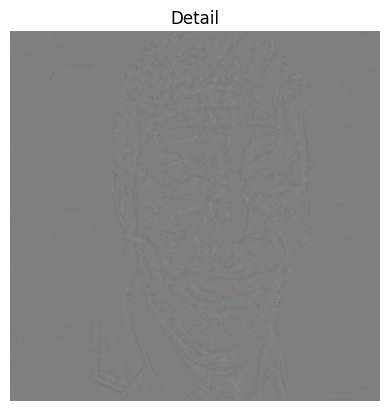

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


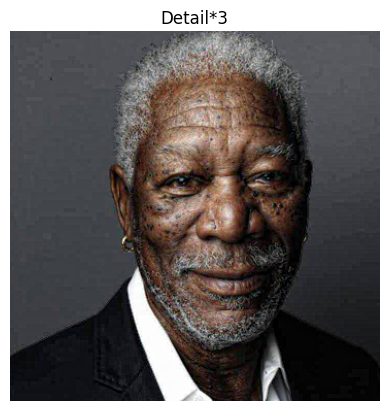

In [29]:
morganTC.showDetailResult()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


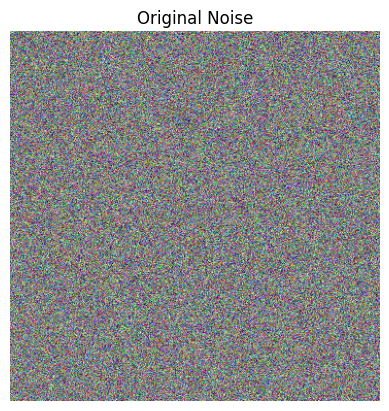

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


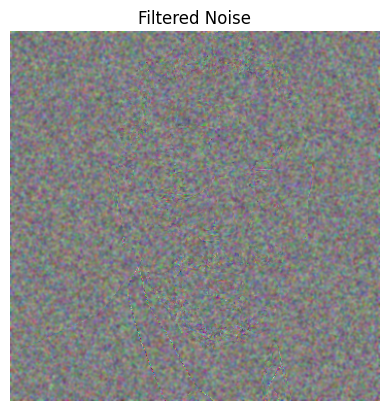

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


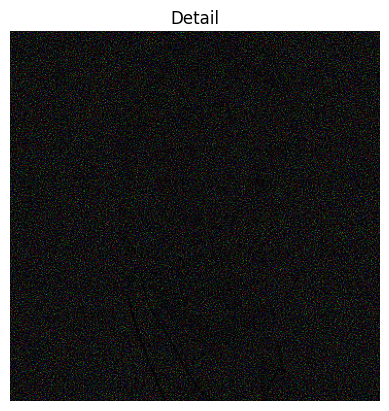

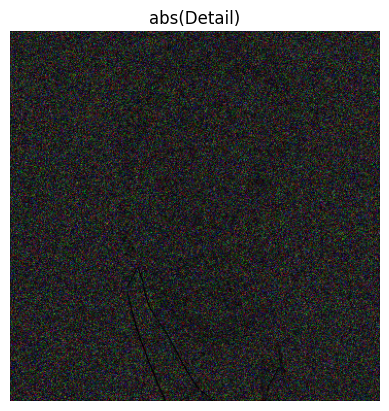

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


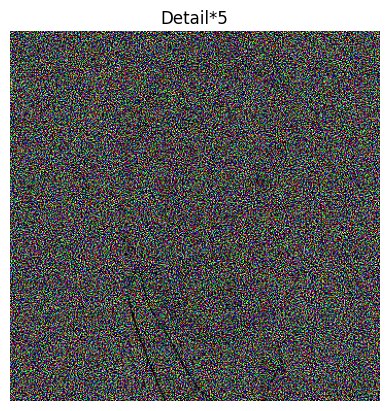

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


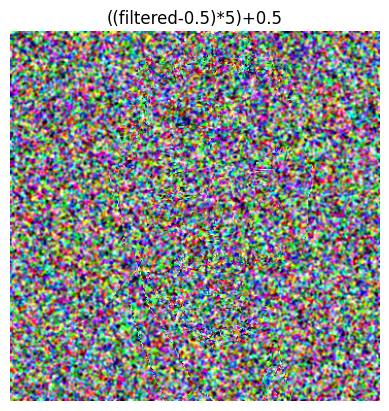

In [30]:
morganTC.showNoiseResult()